In [1]:

import GNN_module.scripts as scripts #only used for on the fly reloads
import GNN_module.metrics as metrics #only used for on the fly reloads
import GNN_module.plotting as plotting #only used for on the fly reloads
import GNN_module.pertubate as pertubate #only used for on the fly reloads
import GNN_module.stats as stats #only used for on the fly reloads

import importlib #only used for on the fly reloads
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures
import numpy as np

from GNN_module.scripts import *
from GNN_module.metrics import *
from GNN_module.plotting import *
from GNN_module.pertubate import *
from GNN_module.stats import *

import random


In [178]:
#Run this to reload the scripts without restarting the kernel
importlib.reload(scripts)
importlib.reload(metrics)
importlib.reload(plotting)
importlib.reload(pertubate)
importlib.reload(stats)
from GNN_module.scripts import *
from GNN_module.metrics import *
from GNN_module.plotting import *
from GNN_module.pertubate import *
from GNN_module.stats import *

In [2]:
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)


# IMPORTANT: write requirements file and readme after work is done

# Datasets

In [8]:
dataset_cora = Planetoid(root='data/Planetoid', name='Cora', transform=NormalizeFeatures())
dataset_citeseer = Planetoid(root='data/Planetoid', name='CiteSeer', transform=NormalizeFeatures())
dataset_pubmed = Planetoid(root='data/Planetoid', name='Pubmed', transform=NormalizeFeatures())

In [9]:
data_cora = dataset_cora[0]
data_citeseer = dataset_citeseer[0]
data_pubmed = dataset_pubmed[0]

In [10]:
dataset_statistics(dataset_cora)

Dataset: Cora():
Number of graphs: 1
Number of features: 1433
Number of classes: 7
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Number of nodes: 2708
Number of edges: 10556
Average node degree: 3.90
Number of training nodes: 140
Training node label rate: 0.05
Has isolated nodes: False
Has self-loops: False
Is undirected: True


In [11]:
dataset_statistics(dataset_citeseer)

Dataset: CiteSeer():
Number of graphs: 1
Number of features: 3703
Number of classes: 6
Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])
Number of nodes: 3327
Number of edges: 9104
Average node degree: 2.74
Number of training nodes: 120
Training node label rate: 0.04
Has isolated nodes: True
Has self-loops: False
Is undirected: True


In [12]:
dataset_statistics(dataset_pubmed)

Dataset: Pubmed():
Number of graphs: 1
Number of features: 500
Number of classes: 3
Data(x=[19717, 500], edge_index=[2, 88648], y=[19717], train_mask=[19717], val_mask=[19717], test_mask=[19717])
Number of nodes: 19717
Number of edges: 88648
Average node degree: 4.50
Number of training nodes: 60
Training node label rate: 0.00
Has isolated nodes: False
Has self-loops: False
Is undirected: True


# Model initialising

In [13]:
gat_cora, optimizer_gat_cora = initialize_model_from_sweep(path_to_sweep='sweeps\sweep_results_gat_Cora.pkl', dataset=dataset_cora, model_type='GAT')
gatv2_cora, optimizer_gatv2_cora = initialize_model_from_sweep(path_to_sweep='sweeps\sweep_results_gatv2_Cora.pkl', dataset=dataset_cora, model_type='GATv2')

gat_citeseer, optimizer_gat_citeseer = initialize_model_from_sweep(path_to_sweep='sweeps\sweep_results_gat_CiteSeer.pkl', dataset=dataset_citeseer, model_type='GAT')
gatv2_citeseer, optimizer_gatv2_citeseer = initialize_model_from_sweep(path_to_sweep='sweeps\sweep_results_gatv2_CiteSeer.pkl', dataset=dataset_citeseer, model_type='GATv2')

gat_pubmed, optimizer_gat_pubmed = initialize_model_from_sweep(path_to_sweep='sweeps\sweep_results_gat_pubmed.pkl', dataset=dataset_pubmed, model_type='GAT')
gatv2_pubmed, optimizer_gatv2_pubmed = initialize_model_from_sweep(path_to_sweep='sweeps\sweep_results_gatv2_pubmed.pkl', dataset=dataset_pubmed, model_type='GATv2')

In [14]:
num_params_gat_cora = count_trainable_parameters(gat_cora)
num_params_gatv2_cora = count_trainable_parameters(gatv2_cora)

print(f'Number of trainable parameters in GAT Cora: {num_params_gat_cora}')
print(f'Number of trainable parameters in GATv2 Cora: {num_params_gatv2_cora}')

Number of trainable parameters in GAT Cora: 47863
Number of trainable parameters in GATv2 Cora: 35203


In [15]:
num_params_gat_citeseer = count_trainable_parameters(gat_citeseer)
num_params_gatv2_citeseer = count_trainable_parameters(gatv2_citeseer)

print(f'Number of trainable parameters in GAT CiteSeer: {num_params_gat_citeseer}')
print(f'Number of trainable parameters in GATv2 CiteSeer: {num_params_gatv2_citeseer}')

Number of trainable parameters in GAT CiteSeer: 243526
Number of trainable parameters in GATv2 CiteSeer: 240342


In [16]:
#Only run if the model is defined

num_params_gat_pubmed = count_trainable_parameters(gat_pubmed)
num_params_gatv2_pubmed = count_trainable_parameters(gatv2_pubmed)

print(f'Number of trainable parameters in GAT Pubmed: {num_params_gat_pubmed}')
print(f'Number of trainable parameters in GATv2 Pubmed: {num_params_gatv2_pubmed}')

Number of trainable parameters in GAT Pubmed: 2033
Number of trainable parameters in GATv2 Pubmed: 35347


# Training

In [17]:
num_epochs = 500
criterion = torch.nn.CrossEntropyLoss()

## CiteSeer

In [18]:
loss_list_gat_citeseer = train_model(num_epochs, gat_citeseer,data_citeseer, optimizer_gat_citeseer, criterion)
loss_list_gatv2_citeseer = train_model(num_epochs, gatv2_citeseer,data_citeseer, optimizer_gatv2_citeseer, criterion)

Training model...
Epoch 500, Loss: 0.8164921402931213
Training finished

Training model...
Epoch 500, Loss: 0.50426828861236575
Training finished



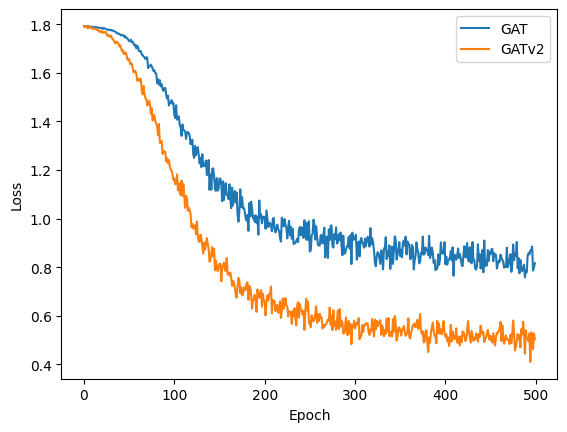

In [19]:
plt.plot(loss_list_gat_citeseer, label='GAT')
plt.plot(loss_list_gatv2_citeseer, label='GATv2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
del loss_list_gat_citeseer, loss_list_gatv2_citeseer
gat_citeseer_acc = test_model(data_citeseer.test_mask, gat_citeseer, data_citeseer)
gatv2_citeseer_acc = test_model(data_citeseer.test_mask, gatv2_citeseer, data_citeseer)

print(f"GAT CiteSeer Test Accuracy: {gat_citeseer_acc:.4f}")
print(f"GATv2 CiteSeer Test Accuracy: {gatv2_citeseer_acc:.4f}")

GAT CiteSeer Test Accuracy: 0.7080
GATv2 CiteSeer Test Accuracy: 0.6960


## Cora

In [21]:
loss_list_gat_cora = train_model(num_epochs, gat_cora, data_cora, optimizer_gat_cora, criterion)
loss_list_gatv2_cora = train_model(num_epochs, gatv2_cora, data_cora, optimizer_gatv2_cora, criterion)

Training model...
Epoch 500, Loss: 0.41977065801620483
Training finished

Training model...
Epoch 500, Loss: 1.2505691051483154
Training finished



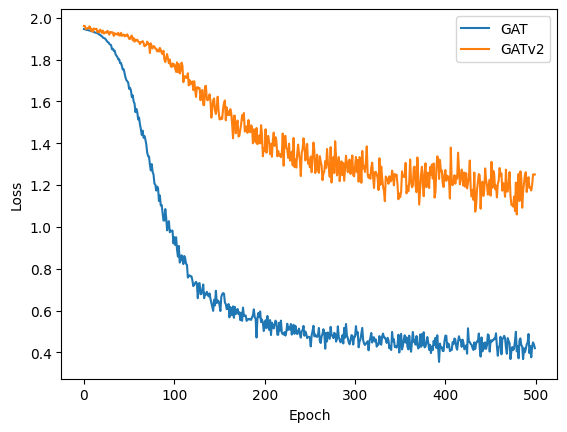

In [22]:
plt.plot(loss_list_gat_cora, label='GAT')
plt.plot(loss_list_gatv2_cora, label='GATv2')

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [23]:
del loss_list_gat_cora, loss_list_gatv2_cora
gat_cora_acc = test_model(data_cora.test_mask, gat_cora, data_cora)
gatv2_cora_acc = test_model(data_cora.test_mask, gatv2_cora, data_cora)

print(f"GAT Cora Test Accuracy: {gat_cora_acc:.4f}")
print(f"GATv2 Cora Test Accuracy: {gatv2_cora_acc:.4f}")

GAT Cora Test Accuracy: 0.7990
GATv2 Cora Test Accuracy: 0.8270


In [24]:
loss_list_gat_pubmed = train_model(num_epochs, gat_pubmed, data_pubmed, optimizer_gat_pubmed, criterion)
loss_list_gatv2_pubmed = train_model(num_epochs, gatv2_pubmed, data_pubmed, optimizer_gatv2_pubmed, criterion)

Training model...
Epoch 500, Loss: 0.43833902478218086
Training finished

Training model...
Epoch 500, Loss: 0.29975083470344543
Training finished



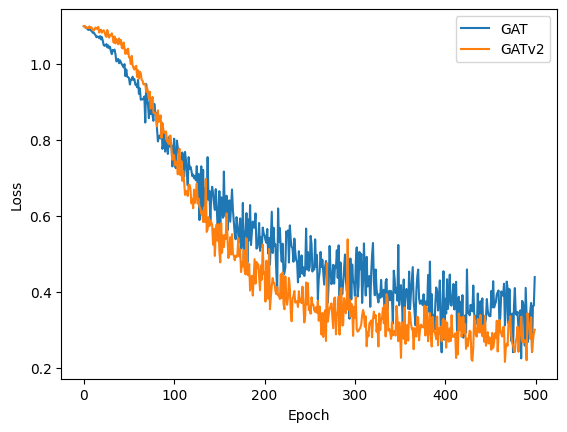

In [25]:
plt.plot(loss_list_gat_pubmed, label='GAT')
plt.plot(loss_list_gatv2_pubmed, label='GATv2')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [26]:
del loss_list_gat_pubmed, loss_list_gatv2_pubmed
gat_pubmed_acc = test_model(data_pubmed.test_mask, gat_pubmed, data_pubmed)
gatv2_pubmed_acc = test_model(data_pubmed.test_mask, gatv2_pubmed, data_pubmed)

print(f"GAT Pubmed Test Accuracy: {gat_pubmed_acc:.4f}")
print(f"GATv2 Pubmed Test Accuracy: {gatv2_pubmed_acc:.4f}")

GAT Pubmed Test Accuracy: 0.7780
GATv2 Pubmed Test Accuracy: 0.7840


## Pubmed

# Robustness

We can test robustness to disruptions in the data in a number of ways:

- Adding feature noise (Gaussian noise to each feature or noise acroos entire dataset)
- Adding non existing edges
- Removing edges

In [31]:
#Number of times each experiment is repeated
n = 10

## Feature noise

In [95]:
test_fun = test_feature_noise_robustness

### CiteSeer

In [96]:
scale_noise_citeseer, test_noise_gat_citeseer = do_n_tests(test_fun, gat_citeseer, data_citeseer, n=n, max_pert=0.25, step=0.01)
_ , test_noise_gatv2_citeseer = do_n_tests(test_fun, gatv2_citeseer, data_citeseer, n=n, max_pert=0.25, step=0.01)

Starting 10 tests...
10/10 tests completed
Finished 10 tests

Starting 10 tests...
10/10 tests completed
Finished 10 tests



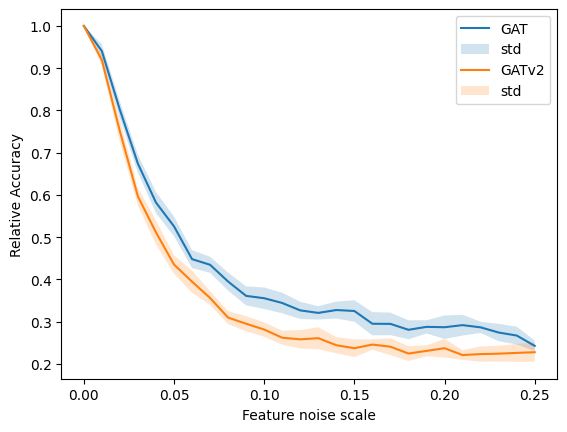

In [97]:
test_noise_citeseer = np.array([test_noise_gat_citeseer, test_noise_gatv2_citeseer])
plot_n_tests(test_noise_citeseer, scale_noise_citeseer, titels=['GAT', 'GATv2'], ylabel = 'Relative Accuracy', xlabel = 'Feature noise scale')

In [34]:
print('GAT')
robustness_report(test_noise_gat_citeseer)
print('\nGATv2')
robustness_report(test_noise_gatv2_citeseer)

GAT
CV: 0.062 ± 0.025
AUC: 10.396 ± 0.148

GATv2
CV: 0.07 ± 0.025
AUC: 8.736 ± 0.114


In [35]:
del scale_noise_citeseer, test_noise_gat_citeseer, test_noise_gatv2_citeseer, test_noise_citeseer

### Cora

In [36]:
scale_noise_cora, test_noise_gat_cora = do_n_tests(test_fun, gat_cora, data_cora, n=n, max_pert=0.25, step=0.01)
_ , test_noise_gatv2_cora = do_n_tests(test_fun, gatv2_cora, data_cora, n=n, max_pert=0.25, step=0.01)

Starting 10 tests...
10/10 tests completed
Finished 10 tests

Starting 10 tests...
10/10 tests completed
Finished 10 tests



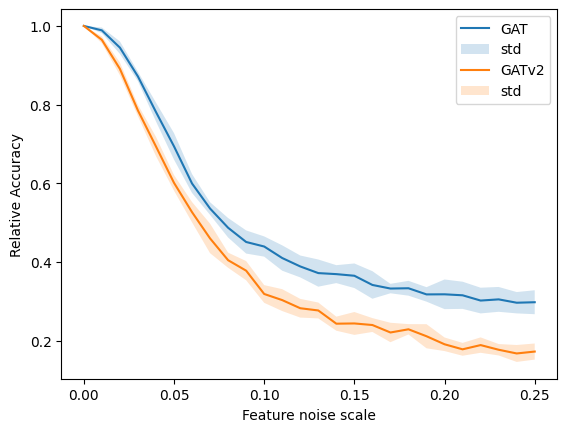

In [37]:
test_noise_cora = np.array([test_noise_gat_cora,test_noise_gatv2_cora])
plot_n_tests(test_noise_cora, scale_noise_cora, titels=['GAT', 'GATv2'], ylabel = 'Relative Accuracy', xlabel = 'Feature noise scale')

In [38]:
print('GAT')
robustness_report(test_noise_gat_cora)
print('\nGATv2')
robustness_report(test_noise_gatv2_cora)

GAT
CV: 0.063 ± 0.034
AUC: 12.201 ± 0.136

GATv2
CV: 0.072 ± 0.037
AUC: 9.754 ± 0.09


In [39]:
del scale_noise_cora, test_noise_gat_cora, test_noise_gatv2_cora, test_noise_cora

###  Pubmed

In [40]:
scale_noise_pubmed, test_noise_gat_pubmed = do_n_tests(test_fun=, gat_pubmed, data_pubmed, n=n, max_pert=0.25, step=0.01)
_ , test_noise_gatv2_pubmed = do_n_tests(test_fun, gatv2_pubmed, data_pubmed, n=n, max_pert=0.25, step=0.01)

Starting 10 tests...
10/10 tests completed
Finished 10 tests

Starting 10 tests...
10/10 tests completed
Finished 10 tests



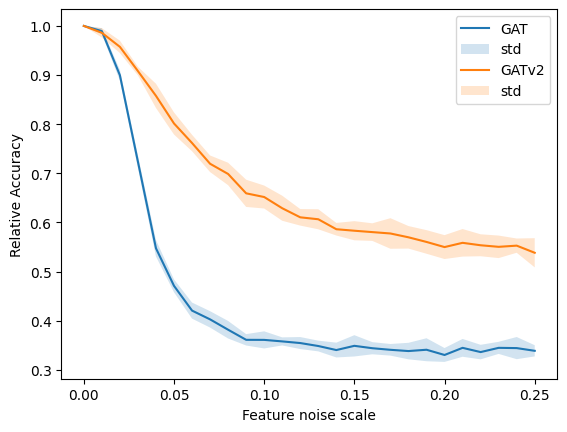

In [41]:
test_noise_pubmed = np.array([test_noise_gat_pubmed,test_noise_gatv2_pubmed])
plot_n_tests(test_noise_pubmed, scale_noise_pubmed, titels=['GAT', 'GATv2'], ylabel = 'Relative Accuracy', xlabel = 'Feature noise scale')

In [42]:
print('GAT')
robustness_report(test_noise_gat_pubmed)
print('\nGATv2')
robustness_report(test_noise_gatv2_pubmed)

GAT
CV: 0.037 ± 0.016
AUC: 11.038 ± 0.112

GATv2
CV: 0.032 ± 0.014
AUC: 16.837 ± 0.081


In [43]:
del scale_noise_pubmed, test_noise_gat_pubmed, test_noise_gatv2_pubmed, test_noise_pubmed

## Adding edges

In [ ]:
test_fun = test_edge_adding_robustness

### CiteSeer

In [44]:
num_added_edges_citeseer, test_AE_gat_citeseer = do_n_tests(test_fun, gat_citeseer, data_citeseer, n=n, max_pert=150, step=5)
_ , test_AE_gatv2_citeseer = do_n_tests(test_fun, gatv2_citeseer, data_citeseer, n=n, max_pert=150, step=5)

Starting 10 tests...
10/10 tests completed
Finished 10 tests

Starting 10 tests...
10/10 tests completed
Finished 10 tests



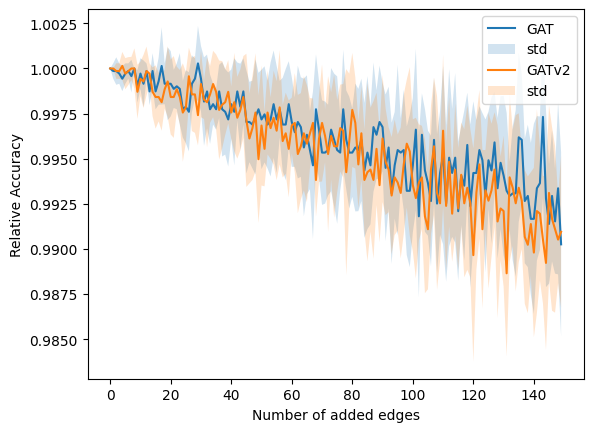

In [45]:
test_AE_citeseer = np.array([test_AE_gat_citeseer, test_AE_gatv2_citeseer])
plot_n_tests(test_AE_citeseer, num_added_edges_citeseer, titels=['GAT', 'GATv2'], ylabel = 'Relative Accuracy', xlabel = 'Number of added edges')

In [46]:
print('GAT')
robustness_report(test_AE_gat_citeseer)
print('\nGATv2')
robustness_report(test_AE_gatv2_citeseer)

GAT
CV: 0.003 ± 0.001
AUC: 148.434 ± 0.031

GATv2
CV: 0.003 ± 0.001
AUC: 148.338 ± 0.039


In [47]:
del num_added_edges_citeseer, test_AE_gat_citeseer, test_AE_gatv2_citeseer, test_AE_citeseer

### Cora

In [48]:
num_added_edges_cora, test_AE_gat_cora = do_n_tests(test_fun, gat_cora, data_cora, n=n, max_pert=150, step=5)
_, test_AE_gatv2_cora = do_n_tests(test_fun, gatv2_cora, data_cora, n=n, max_pert=150, step=5)

Starting 10 tests...
10/10 tests completed
Finished 10 tests

Starting 10 tests...
10/10 tests completed
Finished 10 tests



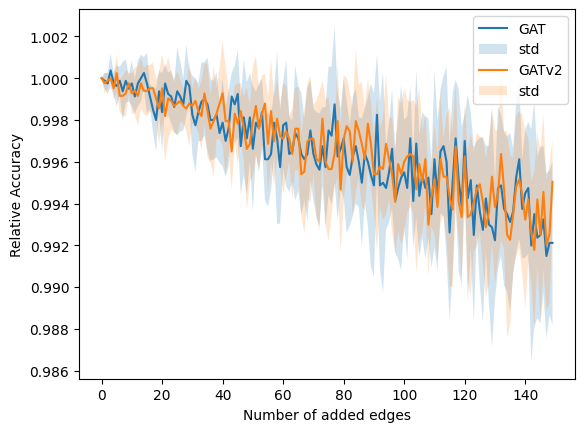

In [49]:
test_AE_cora = np.array([test_AE_gat_cora, test_AE_gatv2_cora])
plot_n_tests(test_AE_cora, num_added_edges_cora, titels=['GAT', 'GATv2'], xlabel='Number of added edges', ylabel='Relative Accuracy')

In [50]:
print('GAT')
robustness_report(test_AE_gat_cora)
print('\nGATv2')
robustness_report(test_AE_gatv2_cora)

GAT
CV: 0.003 ± 0.001
AUC: 148.484 ± 0.038

GATv2
CV: 0.002 ± 0.001
AUC: 148.499 ± 0.027


In [51]:
del num_added_edges_cora, test_AE_gat_cora, test_AE_gatv2_cora, test_AE_cora

### Pubmed

In [52]:
num_added_edges_pubmed, test_AE_gat_pubmed = do_n_tests(test_fun, gat_pubmed, data_pubmed, n=n, max_pert=150, step=5)
_, test_AE_gatv2_pubmed = do_n_tests(test_fun, gatv2_pubmed, data_pubmed, n=n, max_pert=150, step=5)

Starting 10 tests...
10/10 tests completed
Finished 10 tests

Starting 10 tests...
10/10 tests completed
Finished 10 tests



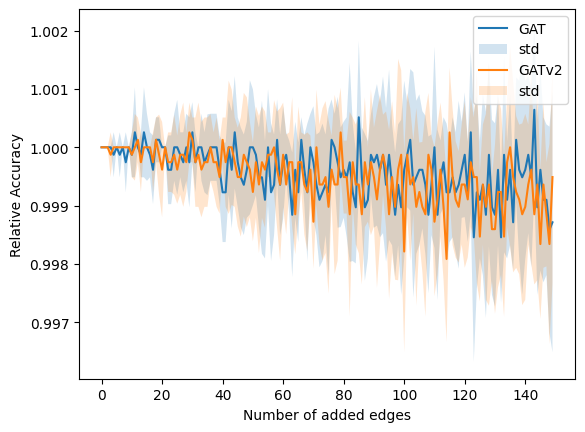

In [53]:
test_AE_pubmed = np.array([test_AE_gat_pubmed, test_AE_gatv2_pubmed])
plot_n_tests(test_AE_pubmed, num_added_edges_pubmed, titels=['GAT', 'GATv2'], xlabel='Number of added edges', ylabel='Relative Accuracy')

In [54]:
print('GAT')
robustness_report(test_AE_gat_pubmed)
print('\nGATv2')
robustness_report(test_AE_gatv2_pubmed)

GAT
CV: 0.001 ± 0.0
AUC: 148.941 ± 0.013

GATv2
CV: 0.001 ± 0.0
AUC: 148.927 ± 0.012


In [55]:
del num_added_edges_pubmed, test_AE_gat_pubmed, test_AE_gatv2_pubmed, test_AE_pubmed

## Removing edges

In [ ]:
test_fun = test_edge_removal_robustness

### CiteSeer

In [36]:
num_removed_edges_citeseer, test_RE_gat_citeseer = do_n_tests(test_fun, gat_citeseer, data_citeseer, n=n, max_pert=1000, step=5)
_ , test_RE_gatv2_citeseer = do_n_tests(test_fun, gatv2_citeseer, data_citeseer, n=n, max_pert=1000, step=5)

Starting 10 tests...
10/10 tests completed
Finished 10 tests

Starting 10 tests...
10/10 tests completed
Finished 10 tests



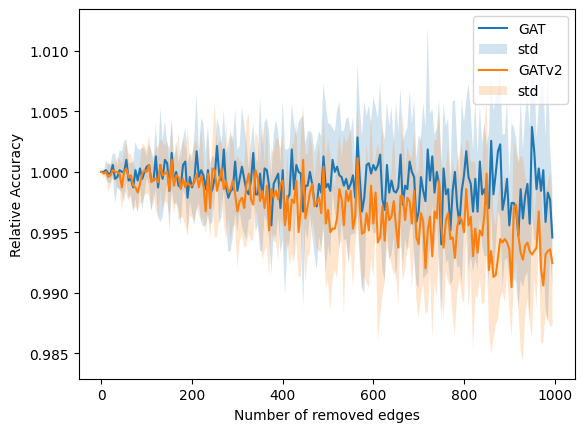

In [37]:
test_RE_citeseer = np.array([test_RE_gat_citeseer, test_RE_gatv2_citeseer])
plot_n_tests(test_RE_citeseer, num_removed_edges_citeseer, titels=['GAT', 'GATv2'], xlabel='Number of removed edges', ylabel='Relative Accuracy')

In [38]:
print('GAT')
robustness_report(test_RE_gat_citeseer)
print('\nGATv2')
robustness_report(test_RE_gatv2_citeseer)

GAT
CV: 0.004 ± 0.002
AUC: 198.829 ± 0.077

GATv2
CV: 0.004 ± 0.002
AUC: 198.412 ± 0.057


In [39]:
del num_removed_edges_citeseer, test_RE_gat_citeseer, test_RE_gatv2_citeseer, test_RE_citeseer

### Cora

In [40]:
num_removed_edges_cora, test_RE_gat_cora = do_n_tests(test_fun, gat_cora, data_cora, n=n, max_pert=1000, step=5)
_, test_RE_gatv2_cora = do_n_tests(test_fun, gatv2_cora, data_cora, n=n, max_pert=1000, step=5)

Starting 10 tests...
10/10 tests completed
Finished 10 tests

Starting 10 tests...
10/10 tests completed
Finished 10 tests



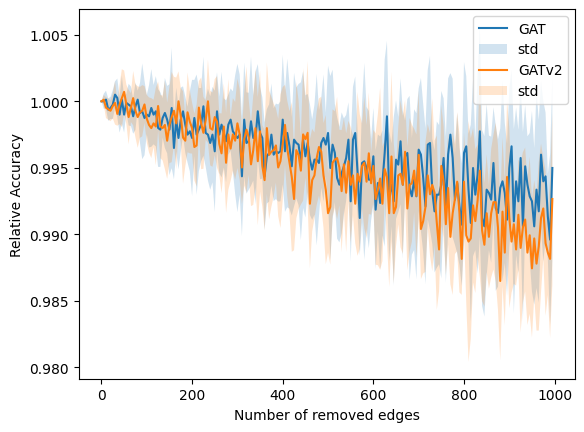

In [41]:
test_RE_cora = np.array([test_RE_gat_cora, test_RE_gatv2_cora])
plot_n_tests(test_RE_cora, num_removed_edges_cora, titels=['GAT', 'GATv2'], xlabel='Number of removed edges', ylabel='Relative Accuracy')

In [42]:
print('GAT')
robustness_report(test_RE_gat_cora)
print('\nGATv2')
robustness_report(test_RE_gatv2_cora)

GAT
CV: 0.004 ± 0.002
AUC: 198.195 ± 0.056

GATv2
CV: 0.004 ± 0.002
AUC: 197.98 ± 0.042


In [43]:
del num_removed_edges_cora, test_RE_gat_cora, test_RE_gatv2_cora, test_RE_cora

### Pubmed

In [ ]:
num_removed_edges_pubmed, test_RE_gat_pubmed = do_n_tests(test_fun, gat_pubmed, data_pubmed, n=n, max_pert=1000, step=5)
_, test_RE_gatv2_pubmed = do_n_tests(test_fun, gatv2_pubmed, data_pubmed, n=n, max_pert=1000, step=5)

In [ ]:
test_RE_pubmed = np.array([test_RE_gat_pubmed, test_RE_gatv2_pubmed])
plot_n_tests(test_RE_pubmed, num_removed_edges_pubmed, titels=['GAT', 'GATv2'], xlabel='Number of removed edges', ylabel='Relative Accuracy')

In [ ]:
print('GAT')
robustness_report(test_RE_gat_pubmed)
print('\nGATv2')
robustness_report(test_RE_gatv2_pubmed)

In [ ]:
del num_removed_edges_pubmed, test_RE_gat_pubmed, test_RE_gatv2_pubmed, test_RE_pubmed

## Removing features


In [ ]:
test_fun = test_feature_removal_robustness

### CiteSeer

In [89]:

num_removed_features_citeseer, test_RF_gat_citeseer = do_n_tests(test_fun, gat_citeseer, data_citeseer, n=n, max_pert=1000, step=5)
_ , test_RF_gatv2_citeseer = do_n_tests(test_fun, gatv2_citeseer, data_citeseer, n=n, max_pert=1000, step=5)

Starting 10 tests...
10/10 tests completed
Finished 10 tests

Starting 10 tests...
10/10 tests completed
Finished 10 tests



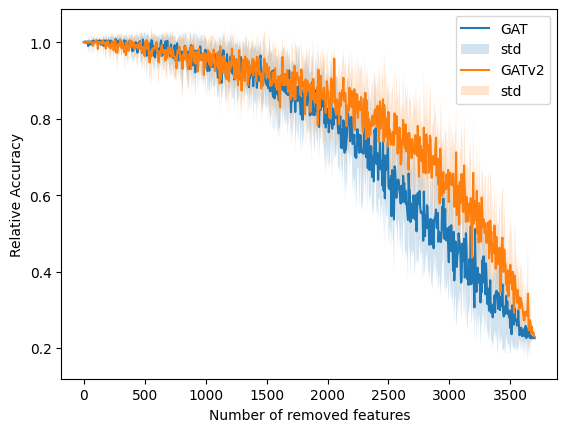

In [90]:
test_RF_citeseer = np.array([test_RF_gat_citeseer, test_RF_gatv2_citeseer])
plot_n_tests(test_RF_citeseer, num_removed_features_citeseer, titels=['GAT', 'GATv2'], xlabel='Number of removed features', ylabel='Relative Accuracy')

In [94]:
print('GAT')
robustness_report(test_RF_gat_citeseer)
print('\nGATv2')
robustness_report(test_RF_gatv2_citeseer)

GAT
CV: 0.127 ± 0.1
AUC: 554.032 ± 2.36

GATv2
CV: 0.107 ± 0.076
AUC: 596.131 ± 1.899


In [77]:
del num_removed_features_citeseer, test_RF_gat_citeseer, test_RF_gatv2_citeseer, test_RF_citeseer

### Cora

In [78]:
num_removed_features_cora, test_RF_gat_cora = do_n_tests(test_fun, gat_cora, data_cora, n=n, max_pert=1000, step=5)
_, test_RF_gatv2_cora = do_n_tests(test_fun, gatv2_cora, data_cora, n=n, max_pert=1000, step=5)

Starting 10 tests...
10/10 tests completed
Finished 10 tests

Starting 10 tests...
10/10 tests completed
Finished 10 tests



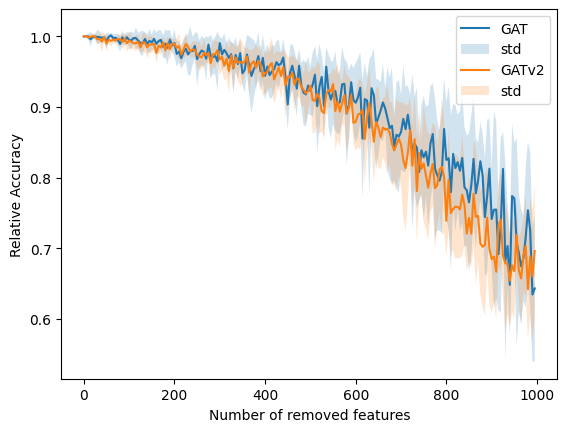

In [79]:
test_RF_cora = np.array([test_RF_gat_cora, test_RF_gatv2_cora])
plot_n_tests(test_RF_cora, num_removed_features_cora, titels=['GAT', 'GATv2'], xlabel='Number of removed features', ylabel='Relative Accuracy')

In [80]:
print('GAT')
robustness_report(test_RF_gat_cora)
print('\nGATv2')
robustness_report(test_RF_gatv2_cora)

GAT
CV: 0.055 ± 0.044
AUC: 180.07 ± 0.753

GATv2
CV: 0.047 ± 0.036
AUC: 176.901 ± 0.444


In [81]:
del num_removed_features_cora, test_RF_gat_cora, test_RF_gatv2_cora, test_RF_cora

### Pubmed

In [86]:
num_removed_features_pubmed, test_RF_gat_pubmed = do_n_tests(test_fun, gat_pubmed, data_pubmed, n=n, max_pert=500, step=5)
_, test_RF_gatv2_pubmed = do_n_tests(test_fun, gatv2_pubmed, data_pubmed, n=n, max_pert=500, step=5)

Starting 10 tests...
10/10 tests completed
Finished 10 tests

Starting 10 tests...
10/10 tests completed
Finished 10 tests



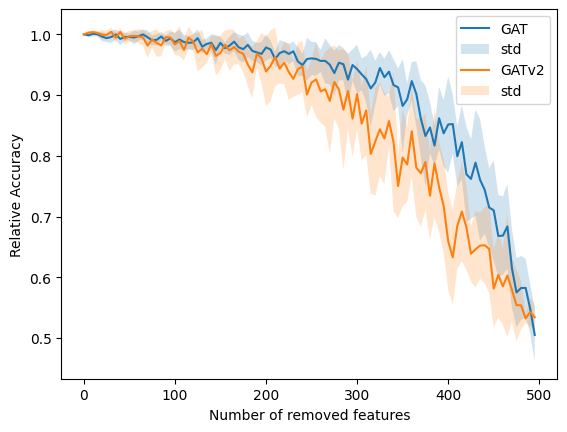

In [87]:
test_RF_pubmed = np.array([test_RF_gat_pubmed, test_RF_gatv2_pubmed])
plot_n_tests(test_RF_pubmed, num_removed_features_pubmed, titels=['GAT', 'GATv2'], xlabel='Number of removed features', ylabel='Relative Accuracy')

In [88]:
print('GAT')
robustness_report(test_RF_gat_pubmed)
print('\nGATv2')
robustness_report(test_RF_gatv2_pubmed)

GAT
CV: 0.038 ± 0.033
AUC: 89.892 ± 0.371

GATv2
CV: 0.056 ± 0.04
AUC: 85.419 ± 0.493


In [ ]:
del num_removed_features_pubmed, test_RF_gat_pubmed, test_RF_gatv2_pubmed, test_RF_pubmed

# Removing nodes

In [179]:
test_fun = test_node_removal_robustness

### CiteSeer

In [187]:
num_removed_nodes_citeseer, test_RN_gat_citeseer = do_n_tests(test_fun, gat_citeseer, data_citeseer, n=n, max_pert=100, step=5)
_ , test_RN_gatv2_citeseer = do_n_tests(test_fun, gatv2_citeseer, data_citeseer, n=n, max_pert=100, step=5)

Starting 10 tests...
10/10 tests completed
Finished 10 tests

Starting 10 tests...
10/10 tests completed
Finished 10 tests



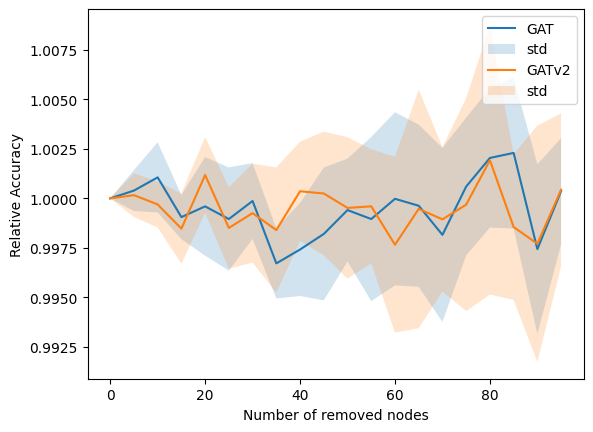

In [188]:
test_RN_citeseer = np.array([test_RN_gat_citeseer, test_RN_gatv2_citeseer])
plot_n_tests(test_RN_citeseer, num_removed_nodes_citeseer, titels=['GAT', 'GATv2'], xlabel='Number of removed nodes', ylabel='Relative Accuracy')

In [189]:
print('GAT')
robustness_report(test_RN_gat_citeseer)
print('\nGATv2')
robustness_report(test_RN_gatv2_citeseer)

GAT
CV: 0.003 ± 0.001
AUC: 18.99 ± 0.01

GATv2
CV: 0.003 ± 0.002
AUC: 18.99 ± 0.008


In [ ]:
del num_removed_nodes_citeseer, test_RN_gat_citeseer, test_RN_gatv2_citeseer, test_RN_citeseer

### Cora

In [201]:
num_removed_nodes_cora, test_RN_gat_cora = do_n_tests(test_fun, gat_cora, data_cora, n=n, max_pert=100, step=5)
_, test_RN_gatv2_cora = do_n_tests(test_fun, gatv2_cora, data_cora, n=n, max_pert=100, step=5)

Starting 10 tests...
10/10 tests completed
Finished 10 tests

Starting 10 tests...
10/10 tests completed
Finished 10 tests



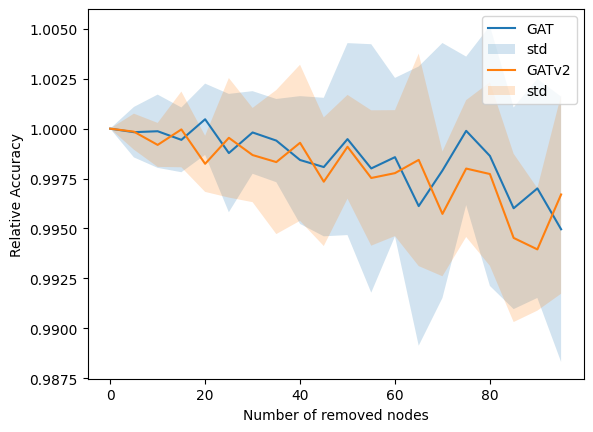

In [202]:
test_RN_cora = np.array([test_RN_gat_cora, test_RN_gatv2_cora])
plot_n_tests(test_RN_cora, num_removed_nodes_cora, titels=['GAT', 'GATv2'], xlabel='Number of removed nodes', ylabel='Relative Accuracy')

In [193]:
print('GAT')
robustness_report(test_RN_gat_cora)
print('\nGATv2')
robustness_report(test_RN_gatv2_cora)

GAT
CV: 0.003 ± 0.001
AUC: 18.964 ± 0.01

GATv2
CV: 0.003 ± 0.001
AUC: 18.958 ± 0.013


In [194]:
del num_removed_nodes_cora, test_RN_gat_cora, test_RN_gatv2_cora, test_RN_cora

### Pubmed

In [196]:
num_removed_nodes_pubmed, test_RN_gat_pubmed = do_n_tests(test_fun, gat_pubmed, data_pubmed, n=n, max_pert=100, step=5)
_, test_RN_gatv2_pubmed = do_n_tests(test_fun, gatv2_pubmed, data_pubmed, n=n, max_pert=100, step=5)

Starting 10 tests...
10/10 tests completed
Finished 10 tests

Starting 10 tests...
10/10 tests completed
Finished 10 tests



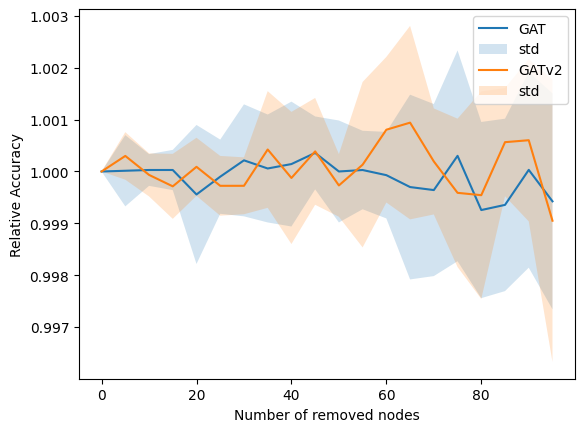

In [197]:
test_RN_pubmed = np.array([test_RN_gat_pubmed, test_RN_gatv2_pubmed])
plot_n_tests(test_RN_pubmed, num_removed_nodes_pubmed, titels=['GAT', 'GATv2'], xlabel='Number of removed nodes', ylabel='Relative Accuracy')

In [198]:
print('GAT')
robustness_report(test_RN_gat_pubmed)
print('\nGATv2')
robustness_report(test_RN_gatv2_pubmed)

GAT
CV: 0.001 ± 0.001
AUC: 18.998 ± 0.004

GATv2
CV: 0.001 ± 0.001
AUC: 19.002 ± 0.004


In [ ]:
del num_removed_nodes_pubmed, test_RN_gat_pubmed, test_RN_gatv2_pubmed, test_RN_pubmed